In [1]:
import itertools
import gc
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_palette('bone')

sns.set_style('darkgrid')

pd.options.display.float_format = '{:,.3f}'.format


print(os.listdir("C:/Users/Marwan/Desktop/BDDAvancées"))

['sample_submission_V2.csv', 'submission_100_Epochs.csv', 'submission_20_Epochs.csv', 'submission_2_Epochs.csv', 'test_V2.csv', 'train_V2.csv']


In [2]:
def product(liste1,liste2):
    return list(itertools.product(liste1,liste2))

In [3]:
def reduire_utilisation_mem(dataFrame):
    
    debut_mem = dataFrame.memory_usage().sum() / 1024**2
    
    for colonne in dataFrame.columns:
        
        colonne_type = dataFrame[colonne].dtype
        
        if colonne_type != object:
            
            colonne_min = dataFrame[colonne].min()
            colonne_max = dataFrame[colonne].max()
            
            if str(colonne_type)[:3] == 'int':
                
                if colonne_min > np.iinfo(np.int8).min and colonne_max < np.iinfo(np.int8).max:
                    dataFrame[colonne] = dataFrame[colonne].astype(np.int8)
                    
                elif colonne_min > np.iinfo(np.int16).min and colonne_max < np.iinfo(np.int16).max:
                    dataFrame[colonne] = dataFrame[colonne].astype(np.int16)
                    
                elif colonne_min > np.iinfo(np.int32).min and colonne_max < np.iinfo(np.int32).max:
                    dataFrame[colonne] = dataFrame[colonne].astype(np.int32)
                    
                elif colonne_min > np.iinfo(np.int64).min and colonne_max < np.iinfo(np.int64).max:
                    dataFrame[colonne] = dataFrame[colonne].astype(np.int64) 
                    
            else:
                
                if colonne_min > np.finfo(np.float32).min and colonne_max < np.finfo(np.float32).max:
                    dataFrame[colonne] = dataFrame[colonne].astype(np.float32)
                    
                else:
                    
                    dataFrame[colonne] = dataFrame[colonne].astype(np.float64)
                    
    fin_mem = dataFrame.memory_usage().sum() / 1024**2
    print("L'utilisation de la memoire du dataframe est passé de {:.2f} MB à {:.2f} MB (decroissant de {:.1f}%)".format(
        debut_mem, fin_mem, 100 * (debut_mem - fin_mem) / debut_mem))
    return dataFrame

In [4]:
%%time

os.chdir('C:/Users/Marwan/Desktop/BDDAvancées')

train = pd.read_csv('train_V2.csv')
train = reduire_utilisation_mem(train)

test = pd.read_csv('test_V2.csv')
test = reduire_utilisation_mem(test)

print(train.shape, test.shape)

L'utilisation de la memoire du dataframe est passé de 983.90 MB à 339.28 MB (decroissant de 65.5%)
L'utilisation de la memoire du dataframe est passé de 413.18 MB à 140.19 MB (decroissant de 66.1%)
(4446966, 29) (1934174, 28)
Wall time: 1min 28s


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int8
boosts             int8
damageDealt        float32
DBNOs              int8
headshotKills      int8
heals              int8
killPlace          int8
killPoints         int16
kills              int8
killStreaks        int8
longestKill        float32
matchDuration      int16
matchType          object
maxPlace           int8
numGroups          int8
rankPoints         int16
revives            int8
rideDistance       float32
roadKills          int8
swimDistance       float32
teamKills          int8
vehicleDestroys    int8
walkDistance       float32
weaponsAcquired    int16
winPoints          int16
winPlacePerc       float32
dtypes: float32(6), int16(5), int8(14), object(4)
memory usage: 339.3+ MB


In [6]:
nbr_null = train.isnull().sum().sort_values()

print("nombre de 'null':", nbr_null[nbr_null > 0])

train.dropna(inplace=True)

nombre de 'null': winPlacePerc    1
dtype: int64


In [7]:
train.describe(include=np.number).drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.234,0.589,0.000,0.000,0.000,0.000,22.000
boosts,1.107,1.716,0.000,0.000,0.000,2.000,33.000
damageDealt,130.633,169.887,0.000,0.000,84.240,186.000,"6,616.000"
DBNOs,0.658,1.146,0.000,0.000,0.000,1.000,53.000
headshotKills,0.227,0.602,0.000,0.000,0.000,0.000,64.000
heals,1.370,2.680,0.000,0.000,0.000,2.000,80.000
killPlace,47.599,27.463,1.000,24.000,47.000,71.000,101.000
killPoints,505.006,627.505,0.000,0.000,0.000,"1,172.000","2,170.000"
kills,0.925,1.558,0.000,0.000,0.000,1.000,72.000
killStreaks,0.544,0.711,0.000,0.000,0.000,1.000,20.000


In [8]:
datas = train.append(test, sort=False).reset_index(drop=True)

del train, test

gc.collect()

35

In [9]:
def remplir(dataFrame, val):
    
    nbcolonnes = dataFrame.select_dtypes(include='number').columns
    cols = nbcolonnes[nbcolonnes != 'winPlacePerc']
    
    dataFrame[dataFrame == np.Inf] = np.NaN
    dataFrame[dataFrame == np.NINF] = np.NaN
    
    for c in cols: dataFrame[c].fillna(val, inplace=True)

In [10]:
datas['_killPlaceOverMaxPlace'] = datas['killPlace'] / datas['maxPlace']

datas['_killsOverWalkDistance'] = datas['kills'] / datas['walkDistance']

datas['_totalDistance'] = datas['rideDistance'] + datas['walkDistance'] + datas['swimDistance']

datas['_healthItems'] = datas['heals'] + datas['boosts']

datas['_headshotKillRate'] = datas['headshotKills'] / datas['kills']

remplir(datas, 0)

In [11]:
match = datas.groupby('matchId')

datas['walkDistancePerc'] = match['walkDistance'].rank(pct=True).values
datas['killsPerc'] = match['kills'].rank(pct=True).values
datas['killPlacePerc'] = match['killPlace'].rank(pct=True).values

datas['walkPerc_killsPerc'] = datas['walkDistancePerc'] / datas['killsPerc']

In [12]:
datas.drop(['rideDistance','swimDistance','matchDuration'], axis=1, inplace=True)
datas.drop(['rankPoints','killPoints','winPoints'], axis=1, inplace=True)

datas.drop(['boosts','heals','revives','assists'], axis=1, inplace=True)
datas.drop(['headshotKills','roadKills','vehicleDestroys','teamKills'], axis=1, inplace=True)

In [13]:
group = datas.groupby(['matchId','groupId','matchType'])
match = datas.groupby(['matchId'])

cols = list(datas.columns)

cols_exclues = ['Id','matchId','groupId','matchType','maxPlace','numGroups','winPlacePerc']

for c in cols_exclues:
    cols.remove(c)
print(cols)

col_somme = ['kills','killPlace','damageDealt','walkDistance','_healthItems']

['damageDealt', 'DBNOs', 'killPlace', 'kills', 'killStreaks', 'longestKill', 'walkDistance', 'weaponsAcquired', '_killPlaceOverMaxPlace', '_killsOverWalkDistance', '_totalDistance', '_healthItems', '_headshotKillRate', 'walkDistancePerc', 'killsPerc', 'killPlacePerc', 'walkPerc_killsPerc']


In [14]:
data_match = pd.concat([
    match.size().to_frame('m.players'), 
    match[col_somme].sum().rename(columns=lambda s: 'm.sum.' + s), 
    match[col_somme].max().rename(columns=lambda s: 'm.max.' + s),
    match[col_somme].mean().rename(columns=lambda s: 'm.mean.' + s)
    ], axis=1).reset_index()

data_match = pd.merge(data_match, 
    group[col_somme].sum().rename(columns=lambda s: 'sum.' + s).reset_index())

data_match = reduire_utilisation_mem(data_match)

print(data_match.shape)

L'utilisation de la memoire du dataframe est passé de 408.37 MB à 288.92 MB (decroissant de 29.3%)
(2912982, 24)


In [15]:
killsMinimum = datas.sort_values(['matchId','groupId','kills','killPlace']).groupby(
    ['matchId','groupId','kills']).first().reset_index().copy()

for n in np.arange(5):
    c = 'kills_' + str(n) + '_Place'
    nbrKills = (killsMinimum['kills'] == n)
    killsMinimum.loc[nbrKills, c] = killsMinimum[nbrKills].groupby(['matchId'])['killPlace'].rank().values
    data_match = pd.merge(data_match, killsMinimum[nbrKills][['matchId','groupId',c]], how='left')
    data_match[c].fillna(0, inplace=True)
    
data_match = reduire_utilisation_mem(data_match)
del killsMinimum, nbrKills

print(data_match.shape)

L'utilisation de la memoire du dataframe est passé de 400.04 MB à 344.48 MB (decroissant de 13.9%)
(2912982, 29)


In [16]:
datas = pd.concat([
    group.size().to_frame('players'),
    group.mean(),
    group[cols].max().rename(columns=lambda s: 'max.' + s),
    group[cols].min().rename(columns=lambda s: 'min.' + s),
    ], axis=1).reset_index()

datas = reduire_utilisation_mem(datas)

print(datas.shape)

L'utilisation de la memoire du dataframe est passé de 883.42 MB à 575.05 MB (decroissant de 34.9%)
(2912982, 58)


In [17]:
nbcolonnes = datas.select_dtypes(include='number').columns.values

nbcolonnes = nbcolonnes[nbcolonnes != 'winPlacePerc']

In [18]:
datas = pd.merge(datas, data_match)

del data_match

gc.collect()

datas['enemy.players'] = datas['m.players'] - datas['players']
for c in col_somme:
    datas['enemy.' + c] = (datas['m.sum.' + c] - datas['sum.' + c]) / datas['enemy.players']
    datas['p.max_msum.' + c] = datas['max.' + c] / datas['m.sum.' + c]
    datas['p.max_mmax.' + c] = datas['max.' + c] / datas['m.max.' + c]
    datas.drop(['m.sum.' + c, 'm.max.' + c], axis=1, inplace=True)
    
remplir(datas, 0)

print(datas.shape)

(2912982, 90)


In [19]:
match = datas.groupby('matchId')
rangMatch = match[nbcolonnes].rank(pct=True).rename(columns=lambda s: 'rank.' + s)
datas = reduire_utilisation_mem(pd.concat([datas, rangMatch], axis=1))
col_rang = rangMatch.columns

del rangMatch

gc.collect()

match = datas.groupby('matchId')
rangMatch = match[col_rang].max().rename(columns=lambda s: 'max.' + s).reset_index()
datas = pd.merge(datas, rangMatch)

for c in nbcolonnes:
    datas['rank.' + c] = datas['rank.' + c] / datas['max.rank.' + c]
    datas.drop(['max.rank.' + c], axis=1, inplace=True)
    
del rangMatch

gc.collect()

print(datas.shape)

L'utilisation de la memoire du dataframe est passé de 2169.65 MB à 1536.25 MB (decroissant de 29.2%)
(2912982, 144)


In [20]:
rangKillMinor = datas[['matchId','min.kills','max.killPlace']].copy()

group = rangKillMinor.groupby(['matchId','min.kills'])

rangKillMinor['rank.minor.maxKillPlace'] = group.rank(pct=True).values

datas = pd.merge(datas, rangKillMinor)

rangKillMinor = datas[['matchId','max.kills','min.killPlace']].copy()

group = rangKillMinor.groupby(['matchId','max.kills'])

rangKillMinor['rank.minor.minKillPlace'] = group.rank(pct=True).values

datas = pd.merge(datas, rangKillMinor)

del rangKillMinor

gc.collect()

70

In [21]:
colonne_cste = [colonne for colonne in datas.columns if datas[colonne].nunique() == 1]

print('colonnes supprimées:', colonne_cste)

datas.drop(colonne_cste, axis=1, inplace=True)

colonnes supprimées: ['rank.maxPlace', 'rank.numGroups']


In [22]:
solo_duo_squad = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'

datas['matchType'] = datas['matchType'].apply(solo_duo_squad)

datas = pd.concat([datas, pd.get_dummies(datas['matchType'], prefix='matchType')], axis=1)

In [23]:
cols = [colonne for colonne in datas.columns if colonne not in ['Id','matchId','groupId']]

for i, t in datas.loc[:, cols].dtypes.iteritems():
    if t == object:
        datas[i] = pd.factorize(datas[i])[0]

        
datas = reduire_utilisation_mem(datas)
datas.head()

L'utilisation de la memoire du dataframe est passé de 1566.81 MB à 1550.14 MB (decroissant de 1.1%)


,matchId,groupId,matchType,players,damageDealt,DBNOs,killPlace,kills,killStreaks,longestKill,...,rank.min._headshotKillRate,rank.min.walkDistancePerc,rank.min.killsPerc,rank.min.killPlacePerc,rank.min.walkPerc_killsPerc,rank.minor.maxKillPlace,rank.minor.minKillPlace,matchType_duo,matchType_solo,matchType_squad
0,0000a43bce5eec,18b16ec699d8b6,0,2,109.675,1.000,41.000,1.000,0.500,6.275,...,0.500,0.286,0.411,0.429,0.143,0.591,1.000,0.000,0.000,1.000
1,0000a43bce5eec,236ab9e9c081b9,0,6,47.988,0.333,90.500,0.000,0.000,0.000,...,0.500,0.054,0.411,0.964,0.054,0.955,0.900,0.000,0.000,1.000
2,0000a43bce5eec,3a6addfa0df938,0,2,0.000,0.000,94.500,0.000,0.000,0.000,...,0.500,0.054,0.411,1.000,0.054,1.000,1.000,0.000,0.000,1.000
3,0000a43bce5eec,4bf06994bd4c9a,0,2,11.700,0.000,59.500,0.000,0.000,0.000,...,0.500,0.429,0.411,0.821,0.857,0.545,0.500,0.000,0.000,1.000
4,0000a43bce5eec,4d1bbbc19b9084,0,2,340.950,2.500,14.000,3.000,1.500,25.230,...,1.000,1.000,0.857,0.143,0.750,0.333,1.000,0.000,0.000,1.000


In [24]:
X_train = datas[datas['winPlacePerc'].notnull()].reset_index(drop=True)
X_test = datas[datas['winPlacePerc'].isnull()].drop(['winPlacePerc'], axis=1).reset_index(drop=True)

del datas

gc.collect()

Y_train = X_train.pop('winPlacePerc')
X_test_groupe = X_test[['matchId','groupId']].copy()



X_train.drop(['matchId','groupId'], axis=1, inplace=True)
X_test.drop(['matchId','groupId'], axis=1, inplace=True)

X_train_colonnes = X_train.columns

print(X_train.shape, X_test.shape)

(2026744, 144) (886238, 144)


In [25]:
from keras.layers import PReLU
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import load_model
from keras.models import Sequential
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.layers import Dense

def creationModel():
    model = Sequential()
    
    model.add(Dense(512, kernel_initializer='he_normal', input_dim=X_train.shape[1], activation='relu'))
    
    model.add(BatchNormalization())
    
    model.add(Dropout(0.2))

    model.add(Dense(256, kernel_initializer='he_normal'))
    
    model.add(PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None))
    
    model.add(BatchNormalization())
    
    model.add(Dropout(0.2))

    model.add(Dense(128, kernel_initializer='he_normal'))
    
    model.add(PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None))
    
    model.add(BatchNormalization())
    
    model.add(Dropout(0.1))

    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    

    optimizer = optimizers.Adam(lr=0.005)
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
    
    return model

Using TensorFlow backend.


In [26]:
def etape_decr(lr_initial=1e-3, factor_decr=0.75, taille_etape=10, verbose=0):
    
    
    def tps(epoch):
        return lr_initial * (factor_decr ** np.floor(epoch/taille_etape))
    
    return LearningRateScheduler(tps, verbose)


lr_tps = etape_decr(lr_initial=0.001, factor_decr=0.97, taille_etape=1, verbose=1)

early_stopping = EarlyStopping(monitor='val_mean_absolute_error', mode='min', patience=10, verbose=1)

In [27]:
from tensorflow import set_random_seed
from sklearn import preprocessing

np.random.seed(42)
set_random_seed(1234)

scaler = preprocessing.StandardScaler().fit(X_train.astype(float))
X_train = scaler.transform(X_train.astype(float))
X_test = scaler.transform(X_test.astype(float))

model = creationModel()
history = model.fit(
        X_train, Y_train,
        epochs=100,
        batch_size=2**15,
        validation_split=0.2,
        callbacks=[lr_tps, early_stopping],
        verbose=2)
pred = model.predict(X_test).ravel()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1621395 samples, validate on 405349 samples
Epoch 1/1

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
 - 98s - loss: 0.0095 - mean_absolute_error: 0.0671 - val_loss: 0.0039 - val_mean_absolute_error: 0.0476


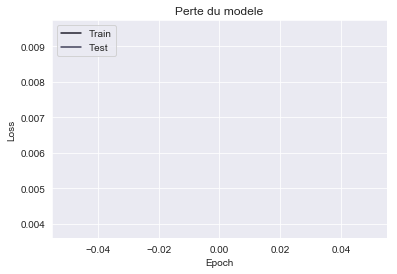

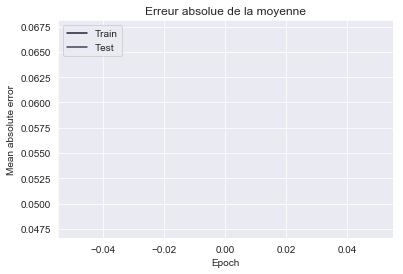

In [28]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('Perte du modele')

plt.xlabel('Epoch')

plt.ylabel('Loss')


plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


plt.plot(history.history['mean_absolute_error'])

plt.plot(history.history['val_mean_absolute_error'])

plt.title('Erreur absolue de la moyenne')

plt.xlabel('Epoch')

plt.ylabel('Mean absolute error')

plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [29]:
X_test = pd.read_csv('C:/Users/Marwan/Desktop/BDDAvancées/test_V2.csv', engine='python')

X_test = X_test.groupby(['matchId','groupId','matchType']).first().reset_index()

X_test = X_test[['matchId','groupId','matchType','numGroups','maxPlace','kills','killPlace']]

group = X_test_groupe.groupby(['matchId'])

X_test_groupe['winPlacePerc'] = pred

X_test_groupe['_rank.winPlacePerc'] = group['winPlacePerc'].rank(method='min')

X_test = pd.merge(X_test, X_test_groupe)

In [30]:
groupeComplet = (X_test['numGroups'] == X_test['maxPlace'])

ssEnsble = X_test.loc[groupeComplet]

X_test.loc[groupeComplet, 'winPlacePerc'] = (ssEnsble['_rank.winPlacePerc'].values - 1) / (ssEnsble['maxPlace'].values - 1)


ssEnsble = X_test.loc[~groupeComplet]

gap = 1.0 / (ssEnsble['maxPlace'].values - 1)

new_val = np.around(ssEnsble['winPlacePerc'].values / gap) * gap

X_test.loc[~groupeComplet, 'winPlacePerc'] = new_val

X_test['winPlacePerc'] = X_test['winPlacePerc'].clip(lower=0,upper=1)

In [31]:
from tqdm import tqdm

print("Vérification des anomalies dans winPlacePerc - les joueurs avec le même nombre de kills doivent avoir des scores dans l’ordre de killPlace")

correct = True
nbr_iteration = 1

while correct & (nbr_iteration <= 1000):
    X_test.sort_values(ascending=False, by=["matchId","kills","killPlace","winPlacePerc","groupId"], inplace=True)
    X_test["winPlacePerc_diff"] = X_test["winPlacePerc"].diff()
    X_test["kills_diff"] = X_test["kills"].diff()
    X_test["prev_matchId"] = X_test["matchId"].shift(1)
    X_test["prev_groupId"] = X_test["groupId"].shift(1)
    X_test["prev_winPlacePerc"] = X_test["winPlacePerc"].shift(1)
    

    dataFrame_ssEns2 = X_test[(X_test["winPlacePerc_diff"] < 0) 
                     & (X_test["kills_diff"] == 0) 
                     & (X_test["matchId"] == X_test["prev_matchId"])]
    
    nbr_anomalies = len(dataFrame_ssEns2)

    print("Iteration " + str(nbr_iteration) + " Nombre d'anomalies : " + str(nbr_anomalies))

    groupesChge = list()
    
    

    if nbr_anomalies > 0:
        print()


        dataFrame_ssEns2["new_winPlacePerc"] = dataFrame_ssEns2["winPlacePerc"] 

        dataFrame_ssEns3 = pd.DataFrame()

        
        for i in tqdm(range(1, min(15001, max(nbr_anomalies, 2))), 
                      desc="Identification des groupes uniques", mininterval=10):
            row = dataFrame_ssEns2.iloc[i - 1]
            id_precedent = str(row["prev_matchId"]) + "!" + str(row["prev_groupId"])
            id_actuel = str(row["matchId"]) + "!" + str(row["groupId"])
            if (not id_precedent in groupesChge) & (not id_actuel in groupesChge):
                groupesChge.append(id_precedent)
                groupesChge.append(id_actuel)
                dataFrame_ssEns3 = dataFrame_ssEns3.append({"matchId": row["matchId"], "groupId": row["prev_groupId"], 
                                          "new_winPlacePerc": row["winPlacePerc"]}, 
                                         sort=False, ignore_index=True)
                dataFrame_ssEns3 = dataFrame_ssEns3.append({"matchId": row["matchId"], "groupId": row["groupId"], 
                                          "new_winPlacePerc": row["prev_winPlacePerc"]}, 
                                         sort=False, ignore_index=True)

        
        dataFrame_ssEns3.drop_duplicates(inplace=True)
        
        X_test = X_test.merge(dataFrame_ssEns3, on=["matchId", "groupId"], how="left")
        
        notna = X_test["new_winPlacePerc"].notna()
        
        X_test.loc[notna, "winPlacePerc"] = X_test.loc[notna]["new_winPlacePerc"]
        
        X_test.drop(labels="new_winPlacePerc", axis=1, inplace=True)
        
        del dataFrame_ssEns2
        
        del dataFrame_ssEns3
        
        dataFrame_ssEns2 = None
        
        dataFrame_ssEns3 = None
        
        gc.collect()
    
    else:
        correct = False

    nbr_iteration = nbr_iteration + 1


if correct:
    print("Limite d'itérations atteinte")

print("Correction finie de winPlacePerc")

Vérification des anomalies dans winPlacePerc - les joueurs avec le même nombre de kills doivent avoir des scores dans l’ordre de killPlace
Iteration 1 Nombre d'anomalies : 113370



C:\Users\Marwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Identification des groupes uniques: 100%|███████████████████████████████████████| 15000/15000 [01:31<00:00, 164.42it/s]


Iteration 2 Nombre d'anomalies : 103663



Identification des groupes uniques: 100%|███████████████████████████████████████| 15000/15000 [01:33<00:00, 159.57it/s]


Iteration 3 Nombre d'anomalies : 94325



Identification des groupes uniques: 100%|███████████████████████████████████████| 15000/15000 [01:26<00:00, 172.61it/s]


Iteration 4 Nombre d'anomalies : 84909



Identification des groupes uniques: 100%|███████████████████████████████████████| 15000/15000 [01:34<00:00, 159.18it/s]


Iteration 5 Nombre d'anomalies : 75488



Identification des groupes uniques: 100%|███████████████████████████████████████| 15000/15000 [01:31<00:00, 164.16it/s]


Iteration 6 Nombre d'anomalies : 66069



Identification des groupes uniques: 100%|███████████████████████████████████████| 15000/15000 [01:24<00:00, 177.31it/s]


Iteration 7 Nombre d'anomalies : 56654



Identification des groupes uniques: 100%|███████████████████████████████████████| 15000/15000 [01:28<00:00, 168.90it/s]


Iteration 8 Nombre d'anomalies : 47248



Identification des groupes uniques: 100%|███████████████████████████████████████| 15000/15000 [01:27<00:00, 172.07it/s]


Iteration 9 Nombre d'anomalies : 37891



Identification des groupes uniques: 100%|███████████████████████████████████████| 15000/15000 [01:16<00:00, 195.98it/s]


Iteration 10 Nombre d'anomalies : 28457



Identification des groupes uniques: 100%|███████████████████████████████████████| 15000/15000 [01:16<00:00, 195.32it/s]


Iteration 11 Nombre d'anomalies : 19130



Identification des groupes uniques: 100%|███████████████████████████████████████| 15000/15000 [01:17<00:00, 194.24it/s]


Iteration 12 Nombre d'anomalies : 9846



Identification des groupes uniques: 100%|█████████████████████████████████████████| 9845/9845 [00:41<00:00, 234.80it/s]


Iteration 13 Nombre d'anomalies : 3897



Identification des groupes uniques: 100%|█████████████████████████████████████████| 3896/3896 [00:14<00:00, 277.66it/s]


Iteration 14 Nombre d'anomalies : 1566



Identification des groupes uniques: 100%|█████████████████████████████████████████| 1565/1565 [00:05<00:00, 291.40it/s]


Iteration 15 Nombre d'anomalies : 584



Identification des groupes uniques: 100%|███████████████████████████████████████████| 583/583 [00:01<00:00, 297.09it/s]


Iteration 16 Nombre d'anomalies : 240



Identification des groupes uniques: 100%|███████████████████████████████████████████| 239/239 [00:00<00:00, 296.22it/s]


Iteration 17 Nombre d'anomalies : 89



Identification des groupes uniques: 100%|█████████████████████████████████████████████| 88/88 [00:00<00:00, 277.47it/s]


Iteration 18 Nombre d'anomalies : 40



Identification des groupes uniques: 100%|█████████████████████████████████████████████| 39/39 [00:00<00:00, 275.31it/s]


Iteration 19 Nombre d'anomalies : 15



Identification des groupes uniques: 100%|█████████████████████████████████████████████| 14/14 [00:00<00:00, 255.00it/s]


Iteration 20 Nombre d'anomalies : 6



Identification des groupes uniques: 100%|███████████████████████████████████████████████| 5/5 [00:00<00:00, 238.71it/s]


Iteration 21 Nombre d'anomalies : 2



Identification des groupes uniques: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 200.57it/s]


Iteration 22 Nombre d'anomalies : 2



Identification des groupes uniques: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 167.12it/s]


Iteration 23 Nombre d'anomalies : 2



Identification des groupes uniques: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 250.81it/s]


Iteration 24 Nombre d'anomalies : 2



Identification des groupes uniques: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 200.50it/s]


Iteration 25 Nombre d'anomalies : 2



Identification des groupes uniques: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 167.12it/s]


Iteration 26 Nombre d'anomalies : 1



Identification des groupes uniques: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 200.55it/s]


Iteration 27 Nombre d'anomalies : 0
Correction finie de winPlacePerc


In [38]:
X_test.loc[X_test['maxPlace'] == 0, 'winPlacePerc'] = 0

X_test.loc[X_test['maxPlace'] == 1, 'winPlacePerc'] = 1 

X_test.loc[(X_test['maxPlace'] > 1) & (X_test['numGroups'] == 1), 'winPlacePerc'] = 0

X_test['winPlacePerc'].describe()

count   886,238.000
mean          0.498
std           0.313
min           0.000
25%           0.213
50%           0.495
75%           0.800
max           1.000
Name: winPlacePerc, dtype: float64

In [33]:
test = pd.read_csv('C:/Users/Marwan/Desktop/BDDAvancées/test_V2.csv', engine='python')

submission = pd.merge(test, X_test[['matchId','groupId','winPlacePerc']])

submission = submission[['Id','winPlacePerc']]

submission.to_csv("submission_100_Epochs.csv", index=False)